In [1]:
import pandas as pd
import os
from pathlib import Path
from matplotlib import pyplot as plt
import coinbase_reader

# Make charts interactive
# %matplotlib widget
%matplotlib inline

In [2]:
closes = coinbase_reader.read('close')
volume = coinbase_reader.read('volume')

print(f'Got {len(closes.columns)} cryptos with max {len(closes)} lines')
print('Cryptos are:')
print(closes.columns.to_list())

Got 391 cryptos with max 3914 lines
Cryptos are:
['VGX', 'RSC', 'RED', 'BNT', 'LAYER', 'SYLO', 'FIDA', 'BARD', 'REQ', 'OPTIM', 'NEAR', 'TRIBE', 'AAVE', 'RPL', 'DESO', 'OGN', 'MEDIA', 'ZK', 'LINEA', 'RAI', 'OMG', 'MAMO', 'SD', 'PRQ', 'GODS', 'GIGA', 'ARB', 'OMNI', 'MORPHO', 'MATIC', 'ALEO', 'EIGEN', 'ALCX', 'PENDLE', 'USDS', 'MUSD', 'COW', 'TRB', 'BAL', 'G', 'ZRO', 'ME', 'AKT', 'DEGEN', 'AVNT', 'ENJ', 'DOGE', 'ROSE', 'FIL', 'ACS', 'ORN', 'LRDS', 'RBN', 'QNT', 'NCT', 'WLFI', 'MUSE', 'ATA', 'BLUR', 'MANA', 'MOBILE', 'KMNO', 'PYTH', 'S', 'PERP', 'RARI', 'FX', 'BTRST', 'DNT', 'DOT', 'LRC', 'FLOCK', 'ATH', 'SXT', 'UMA', 'DASH', 'MAGIC', 'SPELL', 'WCFG', 'ORCA', 'REP', 'AVAX', 'MOG', 'RENDER', 'RLC', 'NEWT', 'LINK', 'AERO', 'API3', 'POLS', 'OSMO', 'BLZ', 'NKN', 'APE', 'LCX', 'SNX', 'PRIME', 'FAI', 'ETHFI', 'LSETH', 'REN', 'AST', 'LDO', 'PRCL', 'WLD', '00', 'DAR', 'CRO', 'DRIFT', '1INCH', 'KERNEL', 'CTX', 'COSMOSDYDX', 'FARTCOIN', 'SWELL', 'SAFE', 'DIA', 'PAX', 'OOKI', 'OCEAN', 'ZETACHAIN', 'C

Most recent nominal volume:
BTC      8.181688e+08
ETH      6.862496e+08
SOL      2.668884e+08
XRP      2.368391e+08
DOGE     7.121181e+07
             ...     
ZORA              NaN
MCO2              NaN
PUMP              NaN
GAL               NaN
TOWNS             NaN
Name: 2025-10-13 00:00:00+00:00, Length: 391, dtype: float64
Highest mean volume:
MOG      2.821306e+12
PEPE     2.217805e+12
BONK     1.398584e+12
SHIB     5.684655e+11
TOSHI    1.469302e+10
             ...     
ZORA              NaN
MCO2              NaN
PUMP              NaN
GAL               NaN
TOWNS             NaN
Name: 2025-10-13 00:00:00+00:00, Length: 391, dtype: float64
Highest closes:
BTC      115067.975
YFI        4895.600
CBETH      4566.470
LSETH      4515.685
ETH        4156.210
            ...    
MONA            NaN
GYEN            NaN
WBTC            NaN
MCO2            NaN
GAL             NaN
Name: 2025-10-13 00:00:00+00:00, Length: 391, dtype: float64


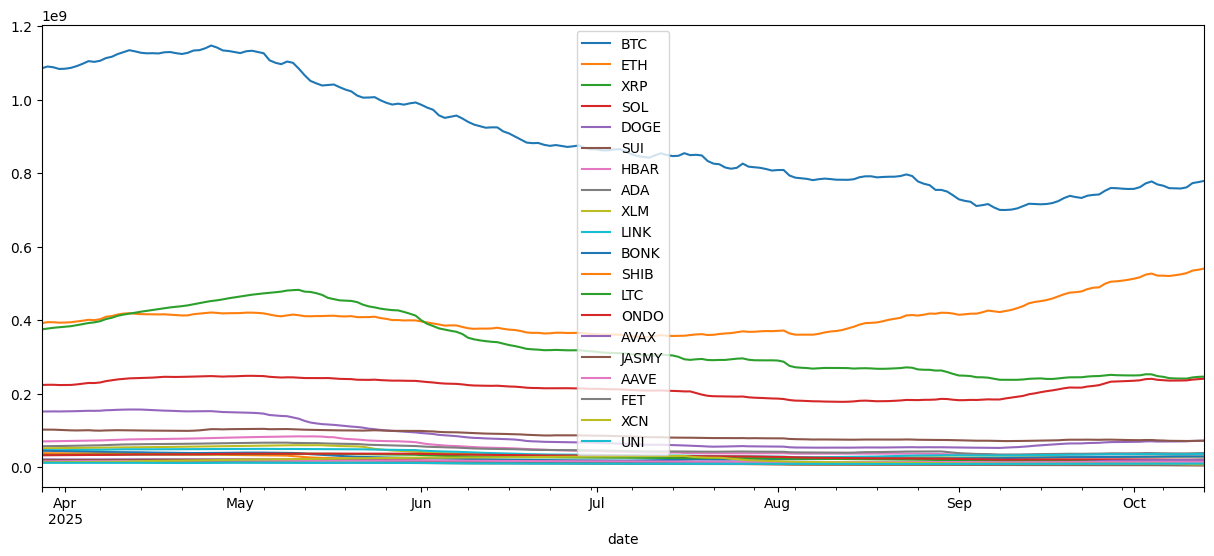

Out of 391 cryptos, 118 are relevant for the index:
['VGX', 'BNT', 'REQ', 'OPTIM', 'NEAR', 'AAVE', 'OGN', 'OMG', 'ARB', 'MATIC', 'TRB', 'ENJ', 'DOGE', 'FIL', 'QNT', 'BLUR', 'MANA', 'DOT', 'LRC', 'UMA', 'DASH', 'SPELL', 'AVAX', 'RENDER', 'LINK', 'AERO', 'NKN', 'APE', 'SNX', 'REN', 'LDO', 'CRO', 'INJ', 'STORJ', 'PENGU', 'NMR', 'MIR', 'LTC', 'YFI', 'NU', 'XCN', 'VET', 'BCH', 'IMX', 'SUI', 'SWFTC', 'ONDO', 'IOTX', 'ZEC', 'GST', 'GRT', 'COMP', 'TRUMP', 'CTSI', 'SOL', 'ZRX', 'SYRUP', 'ANKR', 'BICO', 'ATOM', 'POLY', 'WLUNA', 'TOSHI', 'ICP', 'FARM', 'XYO', 'TAO', 'OXT', 'KEEP', 'BTC', 'BAND', 'ETH', 'MOODENG', 'CLV', 'JTO', 'PEPE', 'SEI', 'UPI', 'POPCAT', 'SHIB', 'SKL', 'UNI', 'RNDR', 'TIA', 'ALGO', 'ASM', 'CHZ', 'STX', 'CRV', 'ACH', 'CGLD', 'FET', 'AMP', 'HBAR', 'BAT', 'COTI', 'AXS', 'IP', 'XLM', 'PLA', 'XRP', 'KNC', 'SUPER', 'ADA', 'ETC', 'AIOZ', 'LPT', 'MKR', 'MASK', 'JASMY', 'BONK', 'SUSHI', 'APT', 'GALA', 'XTZ', 'WIF', 'ENS', 'EOS']


In [3]:
# Slow down volume for index; we don't want to add / remove cryptos constantly
window_size = 180
mean_volume = volume.rolling(window=window_size).mean()
nominal_volume = mean_volume * closes

print('Most recent nominal volume:')
print(nominal_volume.iloc[-1].sort_values(ascending=False));
print('Highest mean volume:')
print(mean_volume.iloc[-1].sort_values(ascending=False));
print('Highest closes:')
print(closes.iloc[-1].sort_values(ascending=False));

# Use average volume * average price as the weight for the instruments for the index (for the next
# period)
mean_nominal_volume = mean_volume * closes.rolling(window=window_size).mean()

youngest = mean_nominal_volume.iloc[-200:]
top20_cols = youngest.iloc[0].nlargest(20).index
youngest[top20_cols].plot(figsize=(15, 6))
plt.show()

# Use a hard cut for small nominal volumes
nominal_volume_threshold = 5_000_000
index_nominal_volume = nominal_volume[mean_nominal_volume > nominal_volume_threshold]
index_nominal_volume.dropna(axis=1, how='all', inplace=True)
index_nominal_volume.dropna(axis=0, how='all', inplace=True)
print(f'Out of {len(closes.columns)} cryptos, {len(index_nominal_volume.columns)} are relevant for the index:')
print(index_nominal_volume.columns.to_list())

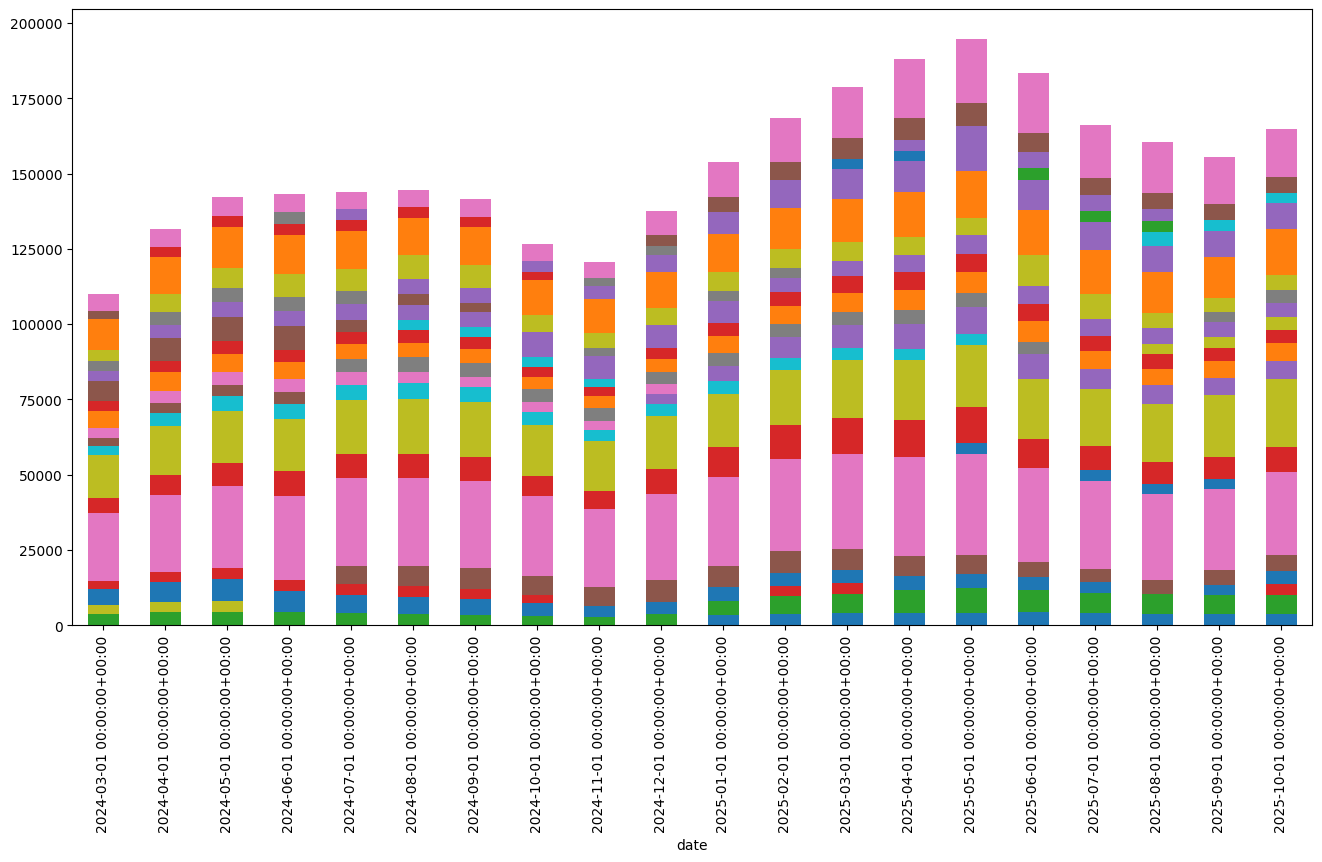

Latest data
BTC        16.70%
ETH        13.74%
XRP         9.59%
SOL         9.31%
SUI         5.21%
DOGE        5.04%
ADA         3.74%
HBAR        3.63%
LINK        3.62%
BONK        3.23%
XLM         3.23%
PEPE        2.94%
ONDO        2.80%
PENGU       2.74%
LTC         2.65%
AVAX        2.61%
MOODENG     2.47%
AAVE        2.32%
AERO        2.29%
TRUMP       2.16%
Name: 2025-10-01 00:00:00+00:00, dtype: object


In [4]:
# for index, row in index_nominal_volume.iterrows():
#   print(f'{index}: {row.dropna().to_dict()}')

# index_nominal_volume.iloc[-20:].plot(kind='bar', stacked=True, legend=False)
# plt.show()

dates = index_nominal_volume.index.to_series()
month_changes = dates[dates.dt.month != dates.shift(1).dt.month]
index_weights = pd.DataFrame()
adjustment = 1

index_weights = mean_nominal_volume.loc[month_changes.index]
index_weights = index_weights.apply(lambda row: row.nlargest(20), axis=1)
# Using pow(0.5) gives more weight to small constituents and reduces the weight of large ones;
# if we don't, Bitcoin has a share of approx. 30%
index_weights = index_weights.pow(0.5)
# index_weights = index_weights.pow(2)
# index_weights[:] = 0
# index_weights['BTC'] = 0.9
# index_weights['ETH'] = 0.1
index_weights.iloc[-20:].plot(figsize=(16, 8), kind='bar', stacked=True, legend=False)
plt.show()

index_weights.to_csv('index_weights.csv')

print('Latest data')
latest = index_weights.iloc[-1].dropna().sort_values(ascending=False)
latest_percent = latest / latest.sum() * 100
latest_percent_formatted = latest_percent.apply(lambda x: f'{x:.2f}%')
print(latest_percent_formatted)

In [5]:
raw_index = {}

def calculate_index_row(close_row, weight_row):
    return (close_row * weight_row).sum()

# Index: 1000 on 2018-01-01
adjustment_factor = 0.01
print('initial factor', adjustment_factor)
current_weight_index = 0
for current_index, row in closes.iterrows():
    print(current_index)
    current_weights = index_weights.iloc[current_weight_index].dropna()
    current_closes = closes.loc[current_index].dropna()
    print(current_closes.to_dict())
    print(current_weights.to_dict())
    # Month change: Update the adjustment_factor. Get the value of the current closes with the
    # previous weights and then the new weights; adjust the new weights so that the value exactly
    # matches the previous one.
    value = calculate_index_row(current_closes, current_weights) * adjustment_factor
    if current_index in index_weights.index and current_weight_index + 1 < len(index_weights):
        print('---')
        next_weights = index_weights.iloc[current_weight_index + 1].dropna()
        next_weight_value = calculate_index_row(current_closes, next_weights) * adjustment_factor
        print(f'prev {value}, next {next_weight_value}')
        adjustment_factor = adjustment_factor * (value / next_weight_value)
        current_weight_index += 1
        print('adj', adjustment_factor)
        print('---')
    print(value)
    raw_index[current_index] = value

index = pd.Series(raw_index)
index.name = 'value'
index.index.name = 'date'

initial factor 0.01
2015-01-15 00:00:00+00:00
{'BTC': 120.0}
{'BTC': 2252.630765439958}
2703.1569185279495
2015-01-16 00:00:00+00:00
{'BTC': 204.22}
{'BTC': 2252.630765439958}
4600.322549181482
2015-01-17 00:00:00+00:00
{'BTC': 199.46}
{'BTC': 2252.630765439958}
4493.097324746541
2015-01-18 00:00:00+00:00
{'BTC': 184.0}
{'BTC': 2252.630765439958}
4144.840608409523
2015-01-20 00:00:00+00:00
{'BTC': 225.51}
{'BTC': 2252.630765439958}
5079.907639143649
2015-01-21 00:00:00+00:00
{'BTC': 218.0}
{'BTC': 2252.630765439958}
4910.735068659108
2015-01-22 00:00:00+00:00
{'BTC': 225.51}
{'BTC': 2252.630765439958}
5079.907639143649
2015-01-23 00:00:00+00:00
{'BTC': 226.32}
{'BTC': 2252.630765439958}
5098.153948343713
2015-01-24 00:00:00+00:00
{'BTC': 235.0}
{'BTC': 2252.630765439958}
5293.682298783901
2015-01-25 00:00:00+00:00
{'BTC': 240.0}
{'BTC': 2252.630765439958}
5406.313837055899
2015-01-26 00:00:00+00:00
{'BTC': 254.53}
{'BTC': 2252.630765439958}
5733.621087274326
2015-01-27 00:00:00+00:00
{

2018-01-01
307054.43360925216
date
2015-01-15 00:00:00+00:00    2.703157e+03
2015-01-16 00:00:00+00:00    4.600323e+03
2015-01-17 00:00:00+00:00    4.493097e+03
2015-01-18 00:00:00+00:00    4.144841e+03
2015-01-20 00:00:00+00:00    5.079908e+03
                                 ...     
2025-10-09 00:00:00+00:00    1.347474e+06
2025-10-10 00:00:00+00:00    1.328810e+06
2025-10-11 00:00:00+00:00    1.231298e+06
2025-10-12 00:00:00+00:00    1.207121e+06
2025-10-13 00:00:00+00:00    1.256328e+06
Name: value, Length: 3914, dtype: float64


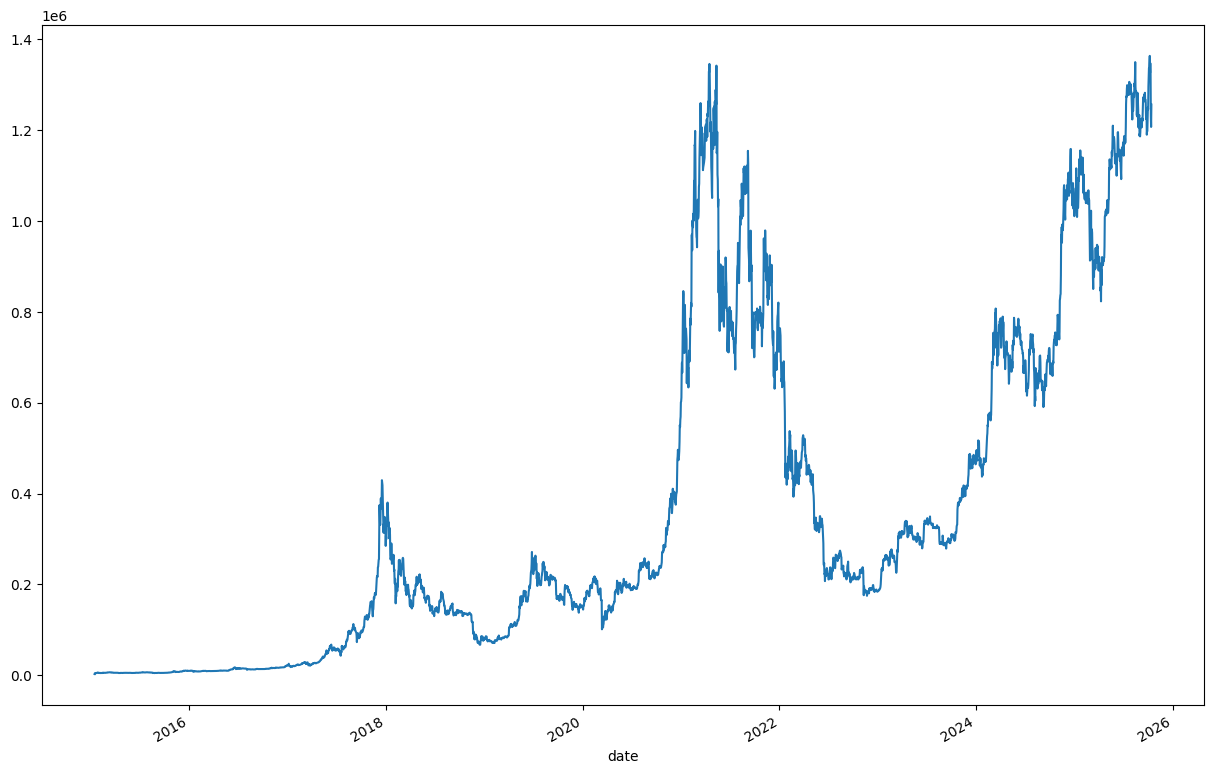

In [6]:
print('2018-01-01')
print(index['2018-01-01'])
print(index)
index.plot(figsize=(15, 10), legend=False)
plt.show()

index.to_csv('./index.csv')